In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
import random
from collections import Counter
import pandas as pd
from tqdm import tqdm
import random
import os
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [11]:
num_class = len(full_dataset.classes)
print(f"Number of classes: {num_class}")
full_dataset.classes

Number of classes: 4


['0-10', '11-20', '21-40', '41-100']

In [12]:
class_name = full_dataset.classes
train_class_counts = Counter(full_dataset.targets)
class_df = pd.DataFrame({
    'Class': [class_name[i] for i in range(num_class)],
    'Count': [train_class_counts[i] for i in range(num_class)]
}).sort_values('Count', ascending=False)

class_df.head(100)

,Class,Count
1,11-20,54
3,41-100,51
0,0-10,50
2,21-40,45


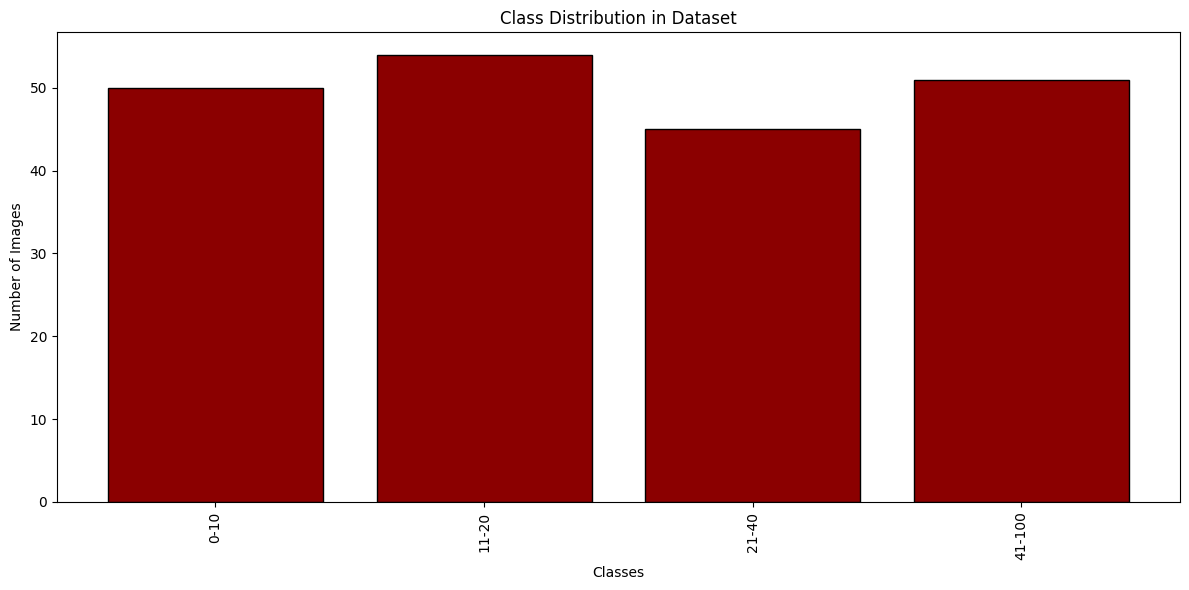

In [13]:
class_counts = [train_class_counts[class_idx] for class_idx in range(len(class_name))]

plt.figure(figsize=(12, 6))
plt.bar(class_name, class_counts, color='darkred', edgecolor='black')
plt.xticks(rotation=90)  
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Dataset")
plt.tight_layout()
plt.show()

In [14]:
max_samples = class_df['Count'].max()
min_samples = class_df['Count'].min()
imbalance_ratio = (max_samples/min_samples)
print(f"\n Class Imbalance Ratio: {imbalance_ratio:.1f}:1 (Max: {max_samples}, Min: {min_samples})")


 Class Imbalance Ratio: 1.2:1 (Max: 54, Min: 45)


In [32]:
def show_sample_images(dataset,num_classes_to_show=32):
    num_classes = len(class_name)
    num_to_show = min(num_classes_to_show, num_classes)

    cols = 8
    rows = (num_to_show + cols - 1) // cols

    # Increase image size (was small before)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 9, rows * 9))  
    
    axes = axes.ravel()

    # Handle dataset label storage
    if hasattr(dataset, "targets"):
        labels_list = dataset.targets
    else:
        labels_list = [dataset[i][1] for i in range(len(dataset))]

    for idx in range(num_to_show):
        class_indices = [i for i, lbl in enumerate(labels_list) if lbl == idx]
        if not class_indices:
            continue
        
        img, label = dataset[class_indices[0]]

        img = img.permute(1, 2, 0)

        axes[idx].imshow(img)
        axes[idx].set_title(
            f"{class_names[label]}\n({train_class_counts[label]} samples)",
            fontsize=12
        )
        axes[idx].axis("off")

    # Hide unused axes
    for j in range(num_to_show, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.savefig("sample_images.png", dpi=150)
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


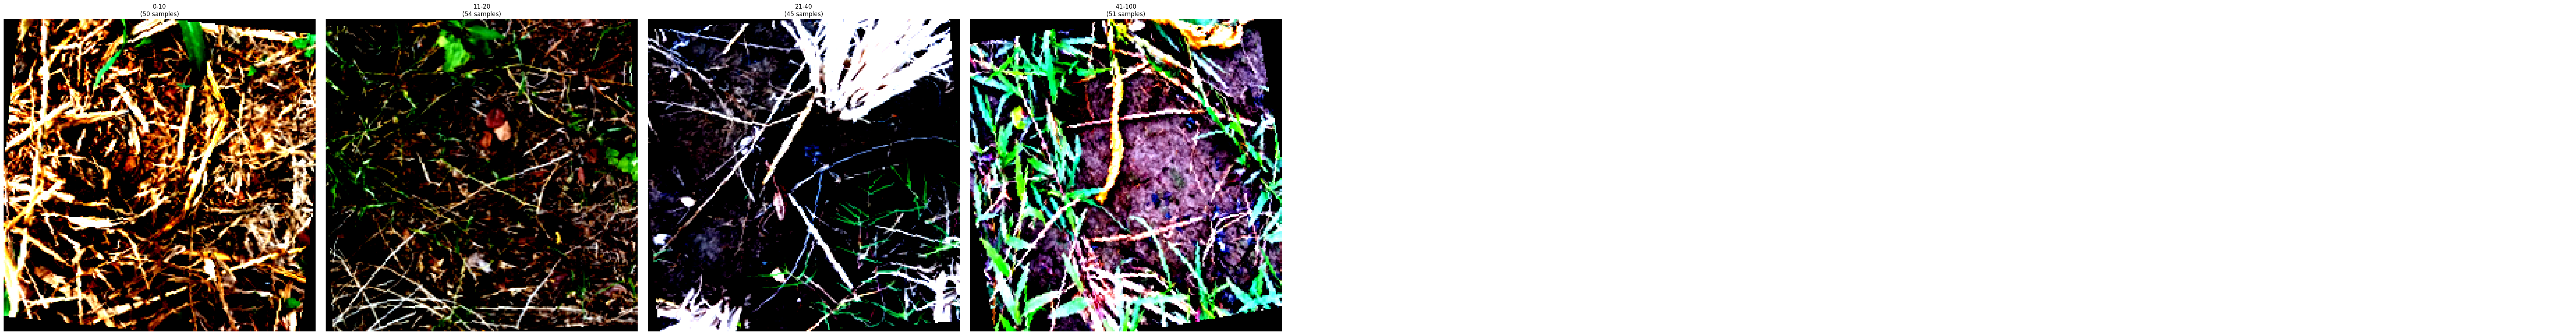

In [33]:
show_sample_images(full_dataset)

Using device: cuda
Classes: ['0-10', '11-20', '21-40', '41-100']
Train samples: 160
Test samples: 40


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 186MB/s] 
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 187MB/s]  
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/30 | Train Acc 21.25% | Val Acc 25.00% | Loss 1.3841
Epoch 2/30 | Train Acc 37.50% | Val Acc 27.50% | Loss 1.3544
Epoch 3/30 | Train Acc 44.38% | Val Acc 32.50% | Loss 1.3189
Epoch 4/30 | Train Acc 48.75% | Val Acc 30.00% | Loss 1.3009
Epoch 5/30 | Train Acc 48.12% | Val Acc 30.00% | Loss 1.3022
Epoch 6/30 | Train Acc 46.25% | Val Acc 37.50% | Loss 1.2698
Epoch 7/30 | Train Acc 42.50% | Val Acc 45.00% | Loss 1.2515
Epoch 8/30 | Train Acc 53.12% | Val Acc 37.50% | Loss 1.2339
Epoch 9/30 | Train Acc 46.88% | Val Acc 45.00% | Loss 1.2283
Epoch 10/30 | Train Acc 50.62% | Val Acc 45.00% | Loss 1.2301
Epoch 11/30 | Train Acc 52.50% | Val Acc 37.50% | Loss 1.2365
Epoch 12/30 | Train Acc 49.38% | Val Acc 40.00% | Loss 1.2093
Epoch 13/30 | Train Acc 51.88% | Val Acc 42.50% | Loss 1.2062
Epoch 14/30 | Train Acc 51.88% | Val Acc 45.00% | Loss 1.1885
Epoch 15/30 | Train Acc 57.50% | Val Acc 40.00% | Loss 1.1647
Epoch 16/30 | Train Acc 53.75% | Val Acc 45.00% | Loss 1.1709
Epoch 17/30 | Tra

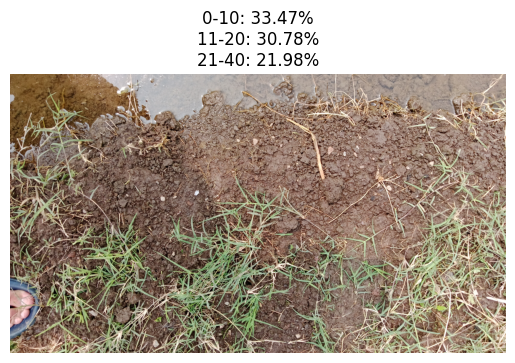

ResNet50 Top-3 Predictions:


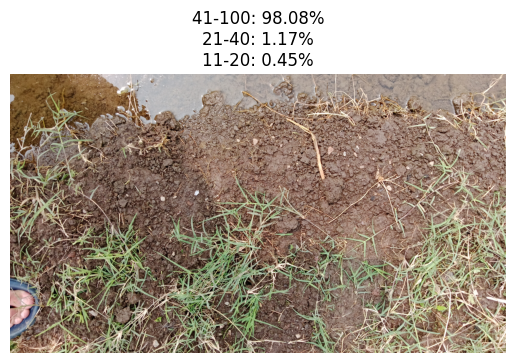

VGG19 Top-3 Predictions:


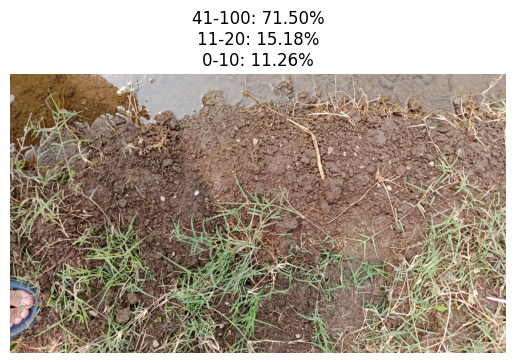

CNN Top-1 Accuracy: 52.50%


<Figure size 1200x1200 with 0 Axes>

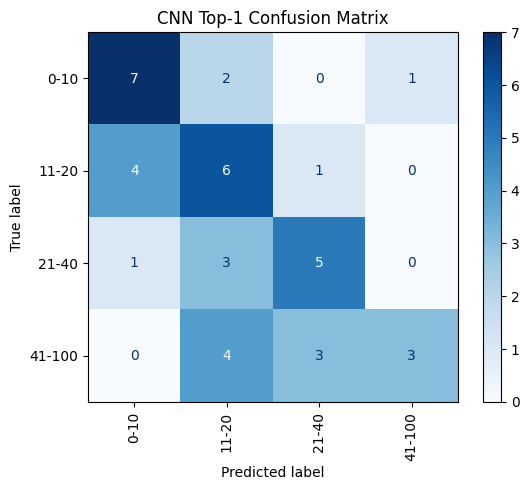

RESNET Top-1 Accuracy: 60.00%


<Figure size 1200x1200 with 0 Axes>

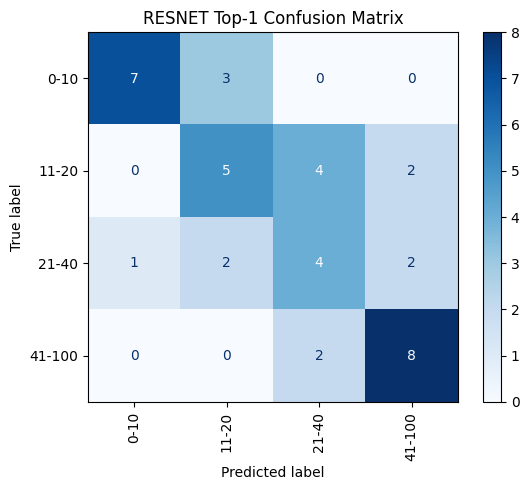

VGG Top-1 Accuracy: 55.00%


<Figure size 1200x1200 with 0 Axes>

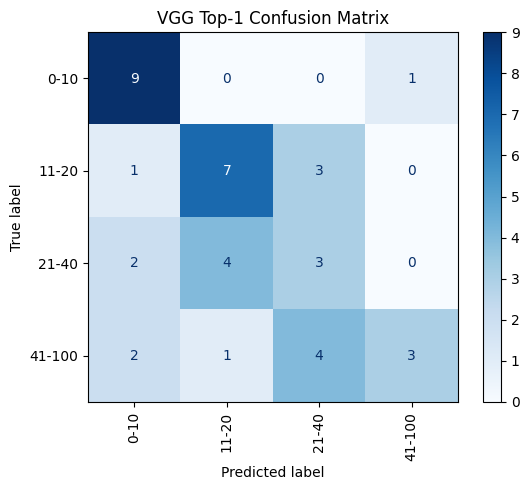

In [1]:
# ============================================================
# IMPORTS
# ============================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os

# ============================================================
# DEVICE
# ============================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ============================================================
# TRANSFORMS
# ============================================================
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224, scale=(0.8,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

# ============================================================
# LOAD DATASET AND SPLIT
# ============================================================
root_path = "/kaggle/input/soil-moisture-dataset/Soil Moisture/"
full_dataset = datasets.ImageFolder(root=root_path, transform=train_transform)

all_indices = list(range(len(full_dataset)))
all_labels = [full_dataset.imgs[i][1] for i in all_indices]

train_indices, test_indices = train_test_split(
    all_indices, test_size=0.2, stratify=all_labels, random_state=42
)

train_dataset = Subset(full_dataset, train_indices)
test_dataset = Subset(datasets.ImageFolder(root=root_path, transform=test_transform), test_indices)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

class_names = full_dataset.classes
num_classes = len(class_names)
print("Classes:", class_names)
print("Train samples:", len(train_dataset))
print("Test samples:", len(test_dataset))

# ============================================================
# CNN MODEL
# ============================================================
class ImprovedCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(3,32,3,padding=1), nn.BatchNorm2d(32), nn.ReLU(), nn.MaxPool2d(2))
        self.conv2 = nn.Sequential(nn.Conv2d(32,64,3,padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2))
        self.conv3 = nn.Sequential(nn.Conv2d(64,128,3,padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2))
        self.conv4 = nn.Sequential(nn.Conv2d(128,256,3,padding=1), nn.BatchNorm2d(256), nn.ReLU(), nn.MaxPool2d(2))
        self.gap = nn.AdaptiveAvgPool2d((1,1))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128,num_classes)
        )
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.gap(x)
        x = self.classifier(x)
        return x

# ============================================================
# INITIALIZE MODELS: CNN + RESNET + VGG19
# ============================================================
cnn_model = ImprovedCNN(num_classes).to(device)

# ---- ResNet50 ----
resnet_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
for param in resnet_model.parameters():
    param.requires_grad = False
for param in resnet_model.layer3.parameters():
    param.requires_grad = True
for param in resnet_model.layer4.parameters():
    param.requires_grad = True
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, num_classes)
resnet_model = resnet_model.to(device)

# ---- VGG19 ----
vgg_model = models.vgg19(weights=models.VGG19_Weights.IMAGENET1K_V1)
for param in vgg_model.features.parameters():
    param.requires_grad = False
vgg_model.classifier[6] = nn.Linear(vgg_model.classifier[6].in_features, num_classes)
vgg_model = vgg_model.to(device)

# Save paths
cnn_weights_path = "/kaggle/working/cnn_soil_best.pth"
resnet_weights_path = "/kaggle/working/resnet50_soil_best.pth"
vgg_weights_path = "/kaggle/working/vgg19_soil_best.pth"

# ============================================================
# TRAINING FUNCTION
# ============================================================
def train_model(model, train_loader, val_loader, num_epochs=30, save_path=None, patience=8, lr=1e-4):
    all_labels = [full_dataset.imgs[i][1] for i in train_indices]
    class_counts = np.bincount(all_labels)
    class_weights = torch.tensor(1.0/(class_counts+1e-6), dtype=torch.float).to(device)

    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                     patience=3, factor=0.5, verbose=True)

    start_epoch = 0
    best_val_loss = float('inf')
    history = {"train_loss":[], "train_acc":[], "val_loss":[], "val_acc":[]}

    if save_path and os.path.exists(save_path):
        checkpoint = torch.load(save_path, map_location=device)
        if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            start_epoch = checkpoint.get('epoch', 0)
            best_val_loss = checkpoint.get('best_val_loss', float('inf'))
            history = checkpoint.get('history', history)
            print(f"Resuming training from epoch {start_epoch}")
        else:
            model.load_state_dict(checkpoint)

    epochs_no_improve = 0
    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss, correct, total = 0,0,0

        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss/len(train_loader)
        train_acc = 100*correct/total

        # ----- Validation -----
        model.eval()
        val_loss, correct, total = 0,0,0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = outputs.max(1)
                correct += preds.eq(labels).sum().item()
                total += labels.size(0)

        val_loss /= len(val_loader)
        val_acc = 100*correct/total

        scheduler.step(val_loss)

        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Acc {train_acc:.2f}% | Val Acc {val_acc:.2f}% | Loss {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            if save_path:
                torch.save({'epoch':epoch+1,'model_state_dict':model.state_dict(),
                            'optimizer_state_dict':optimizer.state_dict(),
                            'best_val_loss':best_val_loss,'history':history},
                           save_path)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    return history

# ============================================================
# TRAIN ALL 3 MODELS
# ============================================================
history_cnn = train_model(cnn_model, train_loader, test_loader,
                          num_epochs=30, save_path=cnn_weights_path, patience=8, lr=1e-4)

history_resnet = train_model(resnet_model, train_loader, test_loader,
                             num_epochs=30, save_path=resnet_weights_path, patience=8, lr=1e-4)

history_vgg = train_model(vgg_model, train_loader, test_loader,
                          num_epochs=30, save_path=vgg_weights_path, patience=8, lr=1e-4)

# ============================================================
# DENORMALIZE
# ============================================================
def denormalize(img_tensor):
    mean = torch.tensor([0.485,0.456,0.406]).view(3,1,1)
    std  = torch.tensor([0.229,0.224,0.225]).view(3,1,1)
    img_tensor = img_tensor.cpu()*std + mean
    img_tensor = img_tensor.permute(1,2,0).numpy()
    return np.clip(img_tensor,0,1)

# ============================================================
# EVALUATION (Top-1 Confusion Matrix)
# ============================================================
def evaluate_model(model_path, model_type, class_names, test_loader, topk=3):

    # ---- Select Model ----
    if model_type=="cnn":
        model = ImprovedCNN(len(class_names))

    elif model_type=="resnet":
        model = models.resnet50(weights=None)
        model.fc = nn.Linear(model.fc.in_features, len(class_names))

    elif model_type=="vgg":
        model = models.vgg19(weights=None)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, len(class_names))

    else:
        raise ValueError("model_type must be 'cnn', 'resnet', or 'vgg'")

    # ---- Load Weights ----
    checkpoint = torch.load(model_path, map_location=device)
    if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
    else:
        model.load_state_dict(checkpoint)

    model.to(device)
    model.eval()

    all_labels=[]
    all_top_preds=[]
    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs = imgs.to(device)
            outputs = model(imgs)

            top_probs, top_idxs = torch.topk(outputs, topk, dim=1)
            all_labels.extend(labels.numpy())
            all_top_preds.extend(top_idxs.cpu().numpy())

    # Top-1 accuracy
    top1_preds = [p[0] for p in all_top_preds]
    acc_top1 = np.mean(np.array(top1_preds)==np.array(all_labels))*100
    print(f"{model_type.upper()} Top-1 Accuracy: {acc_top1:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(all_labels, top1_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    plt.figure(figsize=(12,12))
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
    plt.title(f"{model_type.upper()} Top-1 Confusion Matrix")
    plt.show()

    return cm, all_top_preds

# ============================================================
# SINGLE IMAGE TOP-3 PREDICTION
# ============================================================
def predict_image(model_path, image_path, class_names, model_type="resnet", topk=3):

    if model_type=="cnn":
        model = ImprovedCNN(len(class_names))

    elif model_type=="resnet":
        model = models.resnet50(weights=None)
        model.fc = nn.Linear(model.fc.in_features, len(class_names))

    elif model_type=="vgg":
        model = models.vgg19(weights=None)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, len(class_names))

    checkpoint = torch.load(model_path, map_location=device)
    if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
    else:
        model.load_state_dict(checkpoint)

    model.to(device)
    model.eval()

    transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
    ])

    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_tensor)
        probs = torch.softmax(outputs, dim=1)
        top_probs, top_idxs = torch.topk(probs, topk, dim=1)

    top_probs = (top_probs.squeeze()*100).cpu().numpy()
    top_classes = [class_names[i] for i in top_idxs.squeeze().cpu().numpy()]

    plt.imshow(np.array(img))
    plt.axis("off")
    plt.title("\n".join([f"{c}: {p:.2f}%" for c,p in zip(top_classes,top_probs)]))
    plt.show()

    return list(zip(top_classes, top_probs))

# ============================================================
# EXAMPLES
# ============================================================
image_path = "/kaggle/input/soil-moisture-dataset/Soil Moisture/41-100/W3.jpg"

print("CNN Top-3 Predictions:")
top3_cnn = predict_image(cnn_weights_path, image_path, class_names, model_type="cnn")

print("ResNet50 Top-3 Predictions:")
top3_resnet = predict_image(resnet_weights_path, image_path, class_names, model_type="resnet")

print("VGG19 Top-3 Predictions:")
top3_vgg = predict_image(vgg_weights_path, image_path, class_names, model_type="vgg")

# Confusion Matrices
cm_cnn, _ = evaluate_model(cnn_weights_path, "cnn", class_names, test_loader)
cm_resnet, _ = evaluate_model(resnet_weights_path, "resnet", class_names, test_loader)
cm_vgg, _ = evaluate_model(vgg_weights_path, "vgg", class_names, test_loader)


In [3]:
def plot_graphs(train_loss, test_loss, test_acc, title="Model Performance"):
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(14, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="Train Loss")
    plt.plot(epochs, test_loss, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{title} - Loss")
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, test_acc, label="Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title(f"{title} - Accuracy")
    plt.legend()

    plt.show()


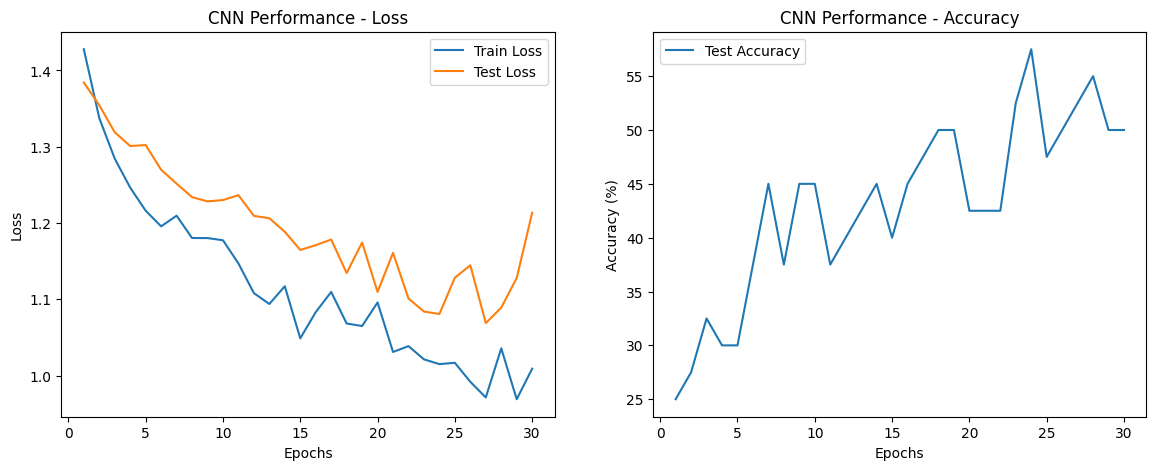

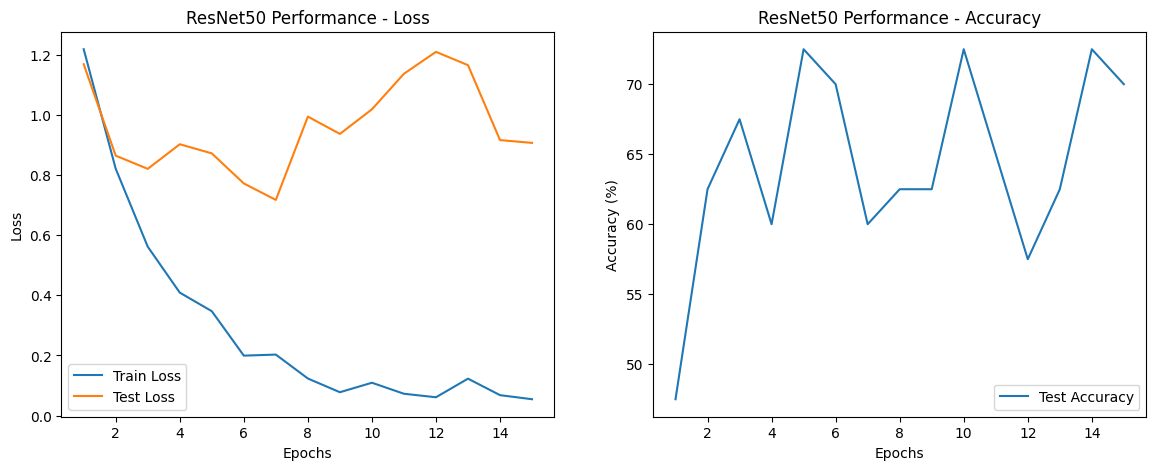

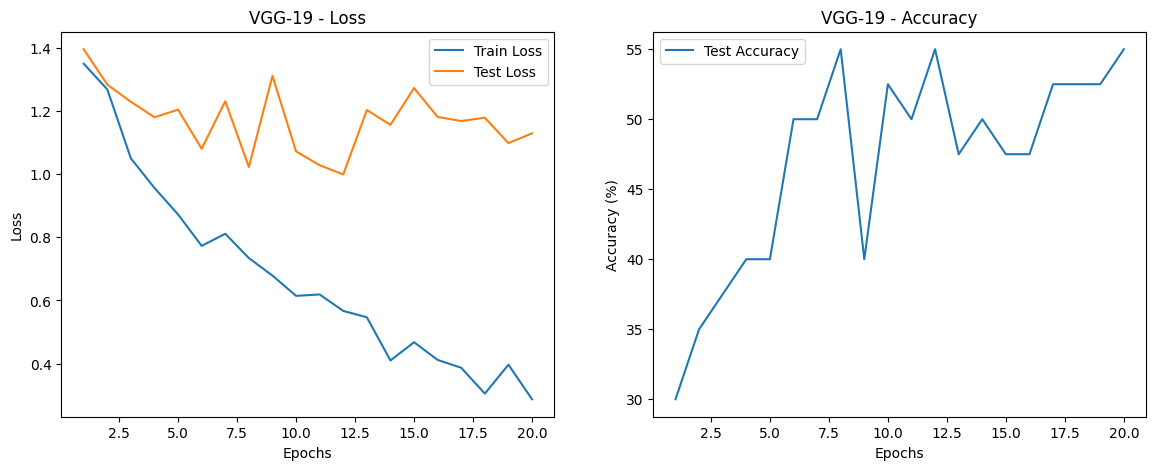

In [4]:
plot_graphs(
    history_cnn["train_loss"],
    history_cnn["val_loss"],
    history_cnn["val_acc"],
    title="CNN Performance"
)

plot_graphs(
    history_resnet["train_loss"],
    history_resnet["val_loss"],
    history_resnet["val_acc"],
    title="ResNet50 Performance"
)

plot_graphs(
    history_vgg["train_loss"],
    history_vgg["val_loss"],
    history_vgg["val_acc"],
    title="VGG-19"
)